This jupyter notebook shows the steps take to extract and filter the data from Cambray et al.
It takes as input 'Count_Data.csv' and returns two .npy files 'Nj_merged' and 'Sij_merged' 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.gridspec as gsp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats 
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))  

# Loading MPRA data 

In [2]:
pd.options.display.max_columns = None
df=pd.read_csv('Count_Data.csv')   # Data from Cambray et al, 2018
df.head()

,Unnamed: 0,RDECAY-SEQ_D0T0_Rep1,RDECAY-SEQ_T0_Rep1,RDECAY-SEQ_T2h_Rep1,RDECAY-SEQ_T5_Rep1,RDECAY-SEQ_T10_Rep1,RDECAY-SEQ_T20_Rep1,RDECAY-SEQ_T40_Rep1,RDECAY-SEQ_D0T0_Rep2,RDECAY-SEQ_T0_Rep2,RDECAY-SEQ_T2h_Rep2,RDECAY-SEQ_T5_Rep2,RDECAY-SEQ_T10_Rep2,RDECAY-SEQ_T20_Rep2,RDECAY-SEQ_T40_Rep2,POLY-SEQ_Frac1,POLY-SEQ_Frac2,POLY-SEQ_Frac3,POLY-SEQ_Frac4,POLY-SEQ_Frac5,POLY-SEQ_Frac6,POLY-SEQ_Frac7,FACS-SEQ_NoCpl_Rep1_bin1,FACS-SEQ_NoCpl_Rep1_bin2,FACS-SEQ_NoCpl_Rep1_bin3,FACS-SEQ_NoCpl_Rep1_bin4,FACS-SEQ_NoCpl_Rep1_bin5,FACS-SEQ_NoCpl_Rep1_bin6,FACS-SEQ_NoCpl_Rep1_bin7,FACS-SEQ_NoCpl_Rep1_bin8,FACS-SEQ_NoCpl_Rep1_bin9,FACS-SEQ_NoCpl_Rep1_bin10,FACS-SEQ_NoCpl_Rep1_bin11,FACS-SEQ_NoCpl_Rep1_bin12,FACS-SEQ_NoCpl_Rep1_bin13,FACS-SEQ_NoCpl_Rep1_bin14,FACS-SEQ_NoCpl_Rep1_bin15,FACS-SEQ_NoCpl_Rep1_bin16,FACS-SEQ_NoCpl_Rep2_bin1,FACS-SEQ_NoCpl_Rep2_bin2,FACS-SEQ_NoCpl_Rep2_bin3,FACS-SEQ_NoCpl_Rep2_bin4,FACS-SEQ_NoCpl_Rep2_bin5,FACS-SEQ_NoCpl_Rep2_bin6,FACS-SEQ_NoCpl_Rep2_bin7,FACS-SEQ_NoCpl_Rep2_bin8,FACS-SEQ_NoCpl_Rep2_bin9,FACS-SEQ_NoCpl_Rep2_bin10,FACS-SEQ_NoCpl_Rep2_bin11,FACS-SEQ_NoCpl_Rep2_bin12,FACS-SEQ_NoCpl_Rep2_bin13,FACS-SEQ_NoCpl_Rep2_bin14,FACS-SEQ_NoCpl_Rep2_bin15,FACS-SEQ_NoCpl_Rep2_bin16,FACS-SEQ_NoCpl_Rep3_bin1,FACS-SEQ_NoCpl_Rep3_bin2,FACS-SEQ_NoCpl_Rep3_bin3,FACS-SEQ_NoCpl_Rep3_bin4,FACS-SEQ_NoCpl_Rep3_bin5,FACS-SEQ_NoCpl_Rep3_bin6,FACS-SEQ_NoCpl_Rep3_bin7,FACS-SEQ_NoCpl_Rep3_bin8,FACS-SEQ_NoCpl_Rep3_bin9,FACS-SEQ_NoCpl_Rep3_bin10,FACS-SEQ_NoCpl_Rep3_bin11,FACS-SEQ_NoCpl_Rep3_bin12,FACS-SEQ_NoCpl_Rep3_bin13,FACS-SEQ_NoCpl_Rep3_bin14,FACS-SEQ_NoCpl_Rep3_bin15,FACS-SEQ_NoCpl_Rep3_bin16,FACS-SEQ_NoCpl_Rep4_bin1,FACS-SEQ_NoCpl_Rep4_bin2,FACS-SEQ_NoCpl_Rep4_bin3,FACS-SEQ_NoCpl_Rep4_bin4,FACS-SEQ_NoCpl_Rep4_bin5,FACS-SEQ_NoCpl_Rep4_bin6,FACS-SEQ_NoCpl_Rep4_bin7,FACS-SEQ_NoCpl_Rep4_bin8,FACS-SEQ_NoCpl_Rep4_bin9,FACS-SEQ_NoCpl_Rep4_bin10,FACS-SEQ_NoCpl_Rep4_bin11,FACS-SEQ_NoCpl_Rep4_bin12,FACS-SEQ_NoCpl_Rep4_bin13,FACS-SEQ_NoCpl_Rep4_bin14,FACS-SEQ_NoCpl_Rep4_bin15,FACS-SEQ_NoCpl_Rep4_bin16,FACS-SEQ_Cpl_Rep1_bin1,FACS-SEQ_Cpl_Rep1_bin2,FACS-SEQ_Cpl_Rep1_bin3,FACS-SEQ_Cpl_Rep1_bin4,FACS-SEQ_Cpl_Rep1_bin5,FACS-SEQ_Cpl_Rep1_bin6,FACS-SEQ_Cpl_Rep1_bin7,FACS-SEQ_Cpl_Rep1_bin8,FACS-SEQ_Cpl_Rep1_bin9,FACS-SEQ_Cpl_Rep1_bin10,FACS-SEQ_Cpl_Rep1_bin11,FACS-SEQ_Cpl_Rep1_bin12,FACS-SEQ_Cpl_Rep1_bin13,FACS-SEQ_Cpl_Rep1_bin14,FACS-SEQ_Cpl_Rep1_bin15,FACS-SEQ_Cpl_Rep1_bin16,FACS-SEQ_Cpl_Rep2_bin1,FACS-SEQ_Cpl_Rep2_bin2,FACS-SEQ_Cpl_Rep2_bin3,FACS-SEQ_Cpl_Rep2_bin4,FACS-SEQ_Cpl_Rep2_bin5,FACS-SEQ_Cpl_Rep2_bin6,FACS-SEQ_Cpl_Rep2_bin7,FACS-SEQ_Cpl_Rep2_bin8,FACS-SEQ_Cpl_Rep2_bin9,FACS-SEQ_Cpl_Rep2_bin10,FACS-SEQ_Cpl_Rep2_bin11,FACS-SEQ_Cpl_Rep2_bin12,FACS-SEQ_Cpl_Rep2_bin13,FACS-SEQ_Cpl_Rep2_bin14,FACS-SEQ_Cpl_Rep2_bin15,FACS-SEQ_Cpl_Rep2_bin16,FACS-SEQ_Cpl_Rep3_bin1,FACS-SEQ_Cpl_Rep3_bin2,FACS-SEQ_Cpl_Rep3_bin3,FACS-SEQ_Cpl_Rep3_bin4,FACS-SEQ_Cpl_Rep3_bin5,FACS-SEQ_Cpl_Rep3_bin6,FACS-SEQ_Cpl_Rep3_bin7,FACS-SEQ_Cpl_Rep3_bin8,FACS-SEQ_Cpl_Rep3_bin9,FACS-SEQ_Cpl_Rep3_bin10,FACS-SEQ_Cpl_Rep3_bin11,FACS-SEQ_Cpl_Rep3_bin12,FACS-SEQ_Cpl_Rep3_bin13,FACS-SEQ_Cpl_Rep3_bin14,FACS-SEQ_Cpl_Rep3_bin15,FACS-SEQ_Cpl_Rep3_bin16,FACS-SEQ_Cpl_Rep4_bin1,FACS-SEQ_Cpl_Rep4_bin2,FACS-SEQ_Cpl_Rep4_bin3,FACS-SEQ_Cpl_Rep4_bin4,FACS-SEQ_Cpl_Rep4_bin5,FACS-SEQ_Cpl_Rep4_bin6,FACS-SEQ_Cpl_Rep4_bin7,FACS-SEQ_Cpl_Rep4_bin8,FACS-SEQ_Cpl_Rep4_bin9,FACS-SEQ_Cpl_Rep4_bin10,FACS-SEQ_Cpl_Rep4_bin11,FACS-SEQ_Cpl_Rep4_bin12,FACS-SEQ_Cpl_Rep4_bin13,FACS-SEQ_Cpl_Rep4_bin14,FACS-SEQ_Cpl_Rep4_bin15,FACS-SEQ_Cpl_Rep4_bin16,FIT-SEQ_Gen0_round1,FIT-SEQ_Gen0_round2,FIT-SEQ_NoCpl_Gen13,FIT-SEQ_NoCpl_Gen28,FIT-SEQ_NoCpl_Gen60_Rep1,FIT-SEQ_NoCpl_Gen60_Rep2,FIT-SEQ_NoCpl_Gen60_Rep3,FIT-SEQ_Cpl_Gen26,FIT-SEQ_Cpl_Gen33_Rep1,FIT-SEQ_Cpl_Gen33_Rep2,FIT-SEQ_Cpl_Gen33_Rep3,FIT-SEQ_NoTx_Gen60_Rep1,FIT-SEQ_NoTx_Gen60_Rep2,FIT-SEQ_NoTx_Gen60_Rep3,FIT-SEQ_Min_Gen33_Rep1,FIT-SEQ_Min_Gen33_Rep2,FIT-SEQ_Min_Gen33_Rep3
0,1_11111111_1,56.0,88,87,116,55,33,116,61.0,149,178,110,79,54,33,44.0,26.0,18.0,19.0,22.0,5.0

We're going to keep only the DNA count data corresponding to the 4 repeats on the same FACS machine

In [3]:
df1=df.loc[:,'FACS-SEQ_NoCpl_Rep1_bin1':'FACS-SEQ_NoCpl_Rep1_bin16']
df1.set_axis(["bin 1", "bin 2",  "bin 3", "bin 4",  "bin 5",  "bin 6",  "bin 7", "bin 8",  "bin 9",  "bin 10", "bin 11",  "bin 12",  "bin 13",  "bin 14", "bin 15",  "bin 16"], axis=1, inplace=True)
df2=df.loc[:,'FACS-SEQ_NoCpl_Rep2_bin1':'FACS-SEQ_NoCpl_Rep2_bin16']
df2.set_axis(["bin 1", "bin 2",  "bin 3", "bin 4",  "bin 5",  "bin 6",  "bin 7", "bin 8",  "bin 9",  "bin 10", "bin 11",  "bin 12",  "bin 13",  "bin 14", "bin 15",  "bin 16"], axis=1, inplace=True)
df3=df.loc[:,'FACS-SEQ_NoCpl_Rep3_bin1':'FACS-SEQ_NoCpl_Rep3_bin16']
df3.set_axis(["bin 1", "bin 2",  "bin 3", "bin 4",  "bin 5",  "bin 6",  "bin 7", "bin 8",  "bin 9",  "bin 10", "bin 11",  "bin 12",  "bin 13",  "bin 14", "bin 15",  "bin 16"], axis=1, inplace=True)
df4=df.loc[:,'FACS-SEQ_NoCpl_Rep4_bin1':'FACS-SEQ_NoCpl_Rep4_bin16']
df4.set_axis(["bin 1", "bin 2",  "bin 3", "bin 4",  "bin 5",  "bin 6",  "bin 7", "bin 8",  "bin 9",  "bin 10", "bin 11",  "bin 12",  "bin 13",  "bin 14", "bin 15",  "bin 16"], axis=1, inplace=True)

Number of reads effectively allocated when merging the repeats?

In [4]:
df_merged=df2.add(df1, fill_value=0)
df_merged=df3.add(df_merged, fill_value=0)
df_merged=df4.add(df_merged, fill_value=0)
df_merged.dropna(inplace=True)
df_merged.values.sum(axis=0) # Return the number of reads allocated in each bin

array([ 1460332.,  2109815.,  2335533.,  3210865.,  4303324.,  5864139.,
        7490610.,  9922865., 12976416., 15188644., 19094267., 23689418.,
       23664179., 21895118., 17576043.,  5519053.])

# Processing and exporting data 

## filtration procedure

Here we filter the data using the same approach as in Cambray et al, 2018:
- We start by specifying a width (here width =2)
- Find the mode of the read distribution for each construct. 
- Zero out the entries of the read data outside of the interval [mode-width,mode+width]

In [10]:
Width=2
Cpt=0
Sij=df_merged.to_numpy().copy()
for i in range(50):
    i_mode=np.argmax(Sij[i,:])
    i_min=max(0,i_mode-Width)
    i_max=min(15,i_mode+Width)
    for p in range(0,i_min):
        Sij[i,p]=0
    for p in range(i_max+1,16):
        Sij[i,p]=0

As an example, let's look at the impact of this filtering step for construct No.i :

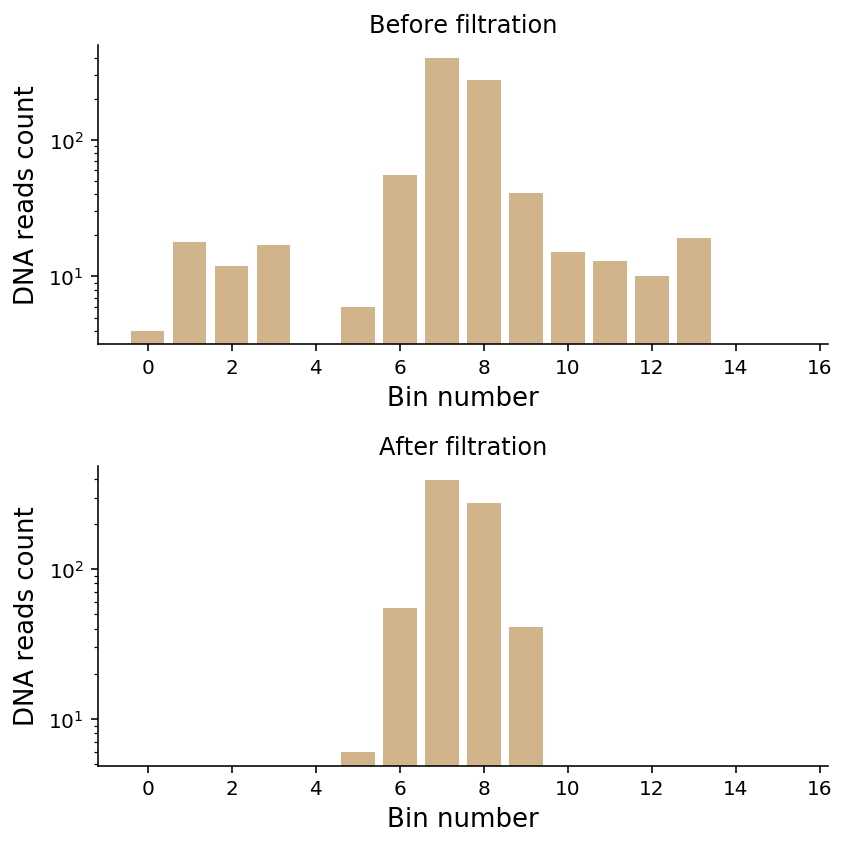

In [13]:
#Select construct number
i=28

plt.figure(figsize=(6,6))
# BEFORE FILTRATION
plt.subplot(211)
plt.bar(x=np.arange(16),height=df_merged.to_numpy()[i,:],color='tan')
plt.yscale('log')
plt.ylabel('DNA reads count',fontsize=13)
plt.xlabel('Bin number',fontsize=13)
plt.title('Before filtration')

# After Filtration
plt.subplot(212)
plt.bar(x=np.arange(16),height=Sij[i,:],color='tan')
plt.yscale('log')
plt.title('After filtration')
plt.ylabel('DNA reads count',fontsize=13)
plt.xlabel('Bin number',fontsize=13)

plt.tight_layout() 
sns.despine()

## Exporting cleaned data

Let's merge and export:

- The FACS events Nj accross the 4 replicates

In [31]:
Nj1=np.array([787412,982020,1465090,1401737,1025836,963772,1043910,1058248,1368234,1473916,2051185,2401738,2235051,1918568,1578880,412599])
Nj2=np.array([1708050,2135082,2541513,2451365,1810054,1876564,1753478,1833778,2352816,2894289,3473222,4475011,4094498,4333992,3180929,707835])
Nj3=np.array([816703,954226,860103,847411,1033611,963772,1134723,1324056,1715162,2079476,2570290,2853233,3130917,3006706,2671311,826699])
Nj4=np.array([693136,919556,989221,1500602,1799781,1717184,2110470,3438801,3781938,4080671,4741939,6838631,6609825,5545670,4354882,1993420])
Nj=Nj1+Nj2+Nj3+Nj4
Nj

array([ 4005301,  4990884,  5855927,  6201115,  5669282,  5521292,
        6042581,  7654883,  9218150, 10528352, 12836636, 16568613,
       16070291, 14804936, 11786002,  3940553])

In [32]:
np.save('Nj_merged',Nj)

- The cleaned sequencing reads Sj

In [ ]:
np.save('Sij_merged',Sij)